In [8]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt 

In [6]:
Drug=[54, 73, 53, 70, 73, 68, 52, 65, 65]
Placebo=[ 54, 51, 58, 44, 55, 52, 42, 47, 58, 46]

npPlacebo=np.array(Placebo)

npDrug=np.array(Drug)


In [13]:
#Create a  bootstrap sample with replacement

bootPlacebo=np.random.choice(npPlacebo,npPlacebo.size,replace=True)
bootDrug=np.random.choice(npDrug,npDrug.size,replace=True)
#calculate bootstrapped differences
meanbootdif=bootDrug.mean()-bootPlacebo.mean()

In [14]:
meanbootdif

12.25555555555556

In [12]:
#Do the above procedure 10000
meanbootdiflist=list()
for i in range (100000):
    bootPlacebo=np.random.choice(npPlacebo,npPlacebo.size,replace=True)
    bootDrug=np.random.choice(npDrug,npDrug.size,replace=True)
    #calculate bootstrapped differences
    meanbootdif=bootDrug.mean()-bootPlacebo.mean()
    meanbootdiflist.append(meanbootdif)
    
    



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a241bc5c0>]],
      dtype=object)

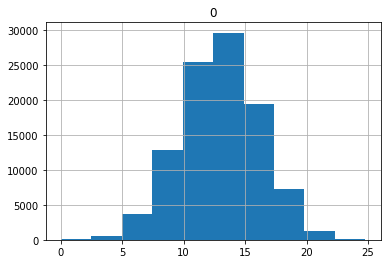

In [15]:
pdBootstrap=pd.DataFrame(meanbootdiflist)
pdBootstrap.hist()

In [16]:

pdConfidence=pdBootstrap[0].sort_values()
np.percentile(pdConfidence,(0.5,0.95))


array([4.67777778, 5.45555556])

#Compute the size of each interval tail. If we want a 90% confidence interval, then 1 - 0.9 yields the
# portion of the interval in the tails. We divide this by 2 to get the size of each tail, in this case 0.05.
#To get the lower bound we multiply the tail size by the number of
# bootstraps we ran and round this value up to the nearest integer (to make sure this value maps
# to an actual boostrap we ran). In this case we multiple 0.05 by 10,000 and get 500, which rounds up to 500.


In [54]:
n=pdConfidence.size
p=0.90
u_pval = (1+p)/2.
l_pval = (1-u_pval)
l_indx = int(np.floor(n*l_pval))
u_indx = int(np.floor(n*u_pval))

In [57]:
ci={pdConfidence[l_indx],pdConfidence[u_indx]}

In [58]:
ci

{8.788888888888884, 14.088888888888889}

In [1]:
import scipy as scp


In [3]:
from scipy import stats

In [7]:
stats.ttest_ind(Drug,Placebo)

Ttest_indResult(statistic=3.9356521028229765, pvalue=0.0010659912818458258)

<h3>Power of Test</h3>
<p>The power increases the larger the size of the sample. Given a desired power and either a distribution D reflecting your prior belief or an empirical distribution (a distribution based on an experiment), you can determine the size of the sample you need to achieve that power.
    </p>
    <p>The idea is simple: assume that D is true and say you are testing some sta- tistic such as the mean M and you want to know how big a sample you'll need to conclude 90% of the time (i.e., with a power of 90%) that M > 50 with a p-value < 0.05.
Specify a sample size S. We will see whether S is large enough to give us the power we want to achieve the alternate (i.e., non-null) hypothesis, that M > 50.
    </p>
  <ul>
     <li>   Try the following 1,000 times:</li>
        
<li> draw 10,000 samples of size S from the empirical distribution with replacement</li>
<li>see whether M is over 50 at least 95% of the time If so, count this as a reject of the null hypothesis</li>
      </ul>
The power is the fraction rejects/1,000. If the power is too low (less than 0.9 in this example), you'll need a bigger sample.</p>

In [6]:
import pandas as pd
data1=pd.read_csv("HAM10000_metadata.csv")

FileNotFoundError: [Errno 2] File b'HAM10000_metadata.csv' does not exist: b'HAM10000_metadata.csv'